<h1>Heart Failure - Support Vector Classification Algorithm</h1>

<h3>Import Dependencies</h3>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

#Support Vector Classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

<h3>Load Cleaned Dataset</h3>

In [2]:
#load dataset
dataset = pd.read_csv('heart_failure_cleaned_dataset.csv')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head(3)

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,old_peak,st_slope,heart_disease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0


<h3>Data Preprocessing</h3>

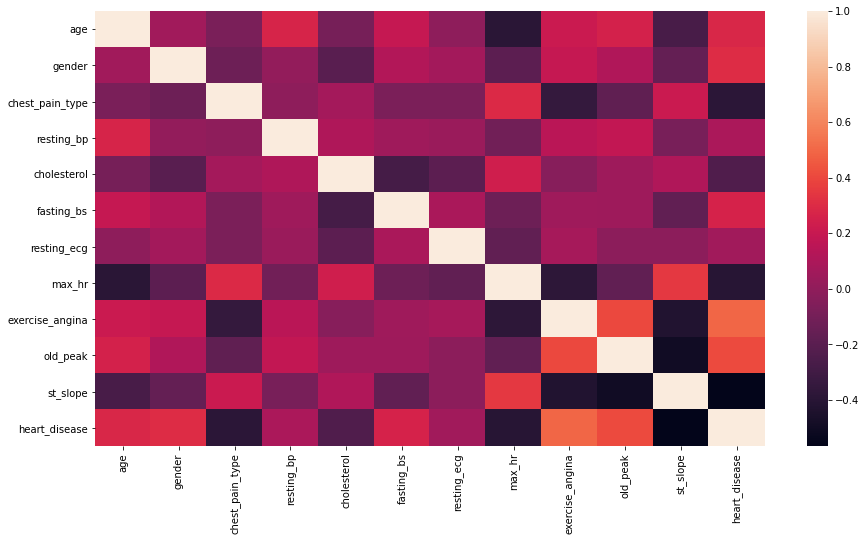

In [3]:
#check correlations
plt.figure(figsize=(15,8))
correlations = dataset.corr(method='pearson')
sns.heatmap(correlations,
           xticklabels=correlations.columns.values,
           yticklabels=correlations.columns.values)
plt.show()

In [4]:
#define and split the dataset
X = dataset.drop(['heart_disease'], axis=1)
Y = dataset['heart_disease']

In [5]:
#let's apply train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=123)

In [6]:
#check the shape
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (724, 11) (724,)
Testing dataset shape: (181, 11) (181,)


<h3>Train Model</h3>

In [9]:
#train the model
svc = SVC()
model = svc.fit(x_train,y_train)
#print the model
print(model)

SVC()


<h3>Evaluate Model</h3>

In [17]:
#let's predict the test set
y_train_pred = model.predict(x_test)
y_train_pred[0:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [16]:
#check accuracy
print()
print("SVC Accuracy:",metrics.accuracy_score(y_test, y_train_pred))
print()


SVC Accuracy: 0.7071823204419889



In [12]:
#train set accuracy
#Check train data score of model
print("*" * 20, "Train Set - Score","*"*20)
train_score = model.score(x_train, y_train)
print("Model Score:", train_score)
print("**" * 10)
print("Model Score (%) :", train_score * 100)

******************** Train Set - Score ********************
Model Score: 0.7251381215469613
********************
Model Score (%) : 72.51381215469614


In [13]:
#Check test data score of model
print("*" * 20, "Test Set - Score","*"*20)
test_score = model.score(x_test, y_test)
print("Model Score:", test_score)
print("**" * 10)
print("Model Score (%) :", test_score * 100)

******************** Test Set - Score ********************
Model Score: 0.7071823204419889
********************
Model Score (%) : 70.71823204419888
